In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import re
from datetime import timedelta, datetime
import datetime
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
import sklearn.preprocessing
import explore
import prepare
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Acquire:

In [2]:
df = pd.read_csv('accident_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39666 entries, 0 to 39665
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crash_url             39666 non-null  object 
 1   case_id               39584 non-null  object 
 2   crash_id              39666 non-null  int64  
 3   crash_city            39666 non-null  object 
 4   crash_date            39666 non-null  object 
 5   crash_latitude        39666 non-null  float64
 6   crash_longitude       39666 non-null  float64
 7   police_dept           39666 non-null  object 
 8   accident_factor       34669 non-null  object 
 9   speed_limit           39666 non-null  object 
 10  crash_location        39666 non-null  object 
 11  num_of_injuries       39666 non-null  int64  
 12  num_of_vehicles       39666 non-null  int64  
 13  num_of_occupants      39666 non-null  int64  
 14  at_fault              39666 non-null  int64  
 15  car_contained_injur

In [4]:
df.head(10)

,crash_url,case_id,crash_id,crash_city,crash_date,crash_latitude,crash_longitude,police_dept,accident_factor,speed_limit,...,driver_age,driver_gender,driver_ethnicity,driver_residence,driver_car_damage,driver_license_type,driver_license_state,driver_insured,traffic_conditions,weather_conditions
0,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21029602,18108949,"SAN ANTONIO, TX",02/15/21 06:08 PM,29.439191,-98.447037,SAN ANTONIO POLICE DEPARTMENT,The driver of 2003 DODGE UNSAFE SPEED,60 MPH,...,28.0,Female,White,NaN,LD - DISTRIBUTED LEFT SIDE DAMAGE PARALLEL IMPACT,"Id card, unlicensed",Texas,Yes,MARKED LANES,CLEAR
1,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21029611,18114287,"SAN ANTONIO, TX",02/15/21 06:12 PM,29.438799,-98.382309,SAN ANTONIO POLICE DEPARTMENT,The driver of 2020 VOLVO UNSAFE SPEED The driv...,65 MPH,...,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,Unknown,MARKED LANES,SNOW
2,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21029611,18114287,"SAN ANTONIO, TX",02/15/21 06:12 PM,29.438799,-98.382309,SAN ANTONIO POLICE DEPARTMENT,The driver of 2020 VOLVO UNSAFE SPEED The driv...,65 MPH,...,32.0,Male,Asian,NaN,L&T - LEFT SIDE AND TOP DAMAGE ROLLOVER EFFECTS,"Commercial driver lic., other/out of state",North Carolina,Yes,MARKED LANES,SNOW
3,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21029621,18116130,"SAN ANTONIO, TX",02/15/21 06:15 PM,29.432061,-98.567334,SAN ANTONIO POLICE DEPARTMENT,The driver of 2002 CHRYSLER FOLLOWED TOO CLOSELY,30 MPH,...,45.0,Male,Hispanic,NaN,BC - BACK END DAMAGE CONCENTRATED IMPACT,"Driver license, class c",Minnesota,Yes,STOP SIGN,SNOW
4,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21029621,18116130,"SAN ANTONIO, TX",02/15/21 06:15 PM,29.432061,-98.567334,SAN ANTONIO POLICE DEPARTMENT,The driver of 2002 CHRYSLER FOLLOWED TOO CLOSELY,30 MPH,...,NaN,Unknown,Unknown,NaN,FC - FRONT END DAMAGE CONCENTRATED IMPACT,"Unknown, unknown",Texas,Yes,STOP SIGN,SNOW
5,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21029621,18116130,"SAN ANTONIO, TX",02/15/21 06:15 PM,29.432061,-98.567334,SAN ANTONIO POLICE DEPARTMENT,The driver of 2002 CHRYSLER FOLLOWED TOO CLOSELY,30 MPH,...,57.0,Male,Hispanic,NaN,BC - BACK END DAMAGE CONCENTRATED IMPACT,"Driver license, class c",Texas,Yes,STOP SIGN,SNOW
6,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,BCSO-2021-0046044,18108922,"unknown, TX",02/15/21 06:18 PM,29.512011,-98.346319,BEXAR COUNTY LAW ENFORCEMENT,The driver of 2001 CHEVROLET OTHER (EXPLAIN IN...,30 MPH,...,31.0,Male,Hispanic,NaN,LFQ - LEFT FRONT QUARTER DAMAGE ANGULAR IMPACT,"Driver license, class c",Texas,Yes,NONE,CLEAR
7,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,202100495,18141558,"LEON VALLEY, TX",02/15/21 06:19 PM,29.484342,-98.604448,LEON VALLEY POLICE DEPARTMENT,The driver of 2019 TOYOTA FAILED TO CONTROL SP...,45 MPH,...,36.0,Male,Black,NaN,BR - BACK END (RIGHT) DAMAGE PARTIAL CONTACT,"Driver license, class c",Texas,Yes,SIGNAL LIGHT WITH RED LIGHT RUNNING CAMERA,SNOW
8,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,202100495,18141558,"LEON VALLEY, TX",02/15/21 06:19 PM,29.484342,-98.604448,LEON VALLEY POLICE DEPARTMENT,The driver of 2019 TOYOTA FAILED TO CONTROL SP...,45 MPH,...,44.0,Male,Black,NaN,FL - FRONT END (LEFT) DAMAGE PARTIAL CONTACT,"Driver license, class a",Texas,Yes,SIGNAL LIGHT WITH RED LIGHT RUNNING CAMERA,SNOW
9,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21029616,18108911,"SAN ANTONIO, TX",02/15/21 06:20 PM,29.510833,-98.397646,SAN ANTONIO POLICE DEPARTMENT,The driver of 2009 TOYOTA OTHER (EXPLAIN IN NA...,-1 MPH,...,40.0,Female,Black,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,NONE,SNOW


# Prepare:

In [5]:
from prepare import clean_collision_data
df = clean_collision_data()
#cross validation on train

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26670 entries, 0 to 39665
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   crash_date              26670 non-null  datetime64[ns]
 1   crash_id                26670 non-null  int64         
 2   crash_latitude          26670 non-null  float64       
 3   crash_longitude         26670 non-null  float64       
 4   crash_occupant_count    26670 non-null  int64         
 5   crash_vehicle_count     26670 non-null  int64         
 6   damage_airbag           26670 non-null  int64         
 7   damage_burned           26670 non-null  int64         
 8   damage_concentrated     26670 non-null  int64         
 9   damage_distributed      26670 non-null  int64         
 10  damage_rollover         26670 non-null  int64         
 11  damage_zone             26670 non-null  int64         
 12  dl_cdl                  26670 non-null  int64 

In [7]:
#creating new column which will bin the times
df.crash_date = df.crash_date.apply(lambda row: pd.to_datetime(row).strftime('%m/%d/%Y %H:%M'))
# extracting date from timestamp

#creating column which is ust hour, then converting the type to string, will repeat this for minutes
df['crashhr'] = pd.to_datetime(df.crash_date).dt.hour
df['crashhr'] = df.crashhr.astype(str)
#######
df['crashmin'] = pd.to_datetime(df.crash_date).dt.minute
df['crashmin'] = df.crashmin.astype(str)
########
#combining 
df['crash_time_24hr'] = (df.crashhr + '.' + df.crashmin)


#float value to bin time

df['crash_time_24hr'] = df['crash_time_24hr'].astype('float64')

df['crash_date'] = pd.to_datetime(df.crash_date).dt.date
df['crash_date'] = df.crash_date.astype(str)


#dropping several columns
df.drop(columns = {'crashhr', 'crashmin'}, inplace = True)

In [8]:
df.crash_time_24hr.value_counts()

18.00    214
17.00    214
19.00    192
18.30    177
16.30    177
        ... 
6.19       1
1.54       1
5.28       1
23.51      1
5.59       1
Name: crash_time_24hr, Length: 1312, dtype: int64

In [9]:
df['time_frames'] = pd.cut(df.crash_time_24hr, 
                    bins=[0,6,9,12,15,18,24], 
                    include_lowest=False,)

In [10]:
df.time_frames.value_counts()

(18, 24]    7989
(15, 18]    6264
(12, 15]    4821
(9, 12]     3115
(0, 6]      2379
(6, 9]      2061
Name: time_frames, dtype: int64

-------

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=19, stratify=df.injury_class)

In [12]:
train.shape, test.shape

((21336, 42), (5334, 42))

----

In [13]:
def split_X_y(train, test, target):
    '''
    Splits train, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 2 dataframes and 2 series:
    X_train (df) & y_train (series), X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_test, y_test

#scale the data

In [14]:
X_train, y_train, X_test, y_test = split_X_y(train,test,'fault_class')

In [15]:
def scale_data(train, test, scale_type = None, to_scale = None):
    '''
    returns scaled data of specified type into data frame, will
    '''
    train_copy = train.copy()
    test_copy = test.copy()
    
    if to_scale == None:
        return train_copy, test_copy
    
    else:
        X_train = train_copy[to_scale]
        X_test = test_copy[to_scale]
        
        
        min_max_scaler = MinMaxScaler()
        robust_scaler = RobustScaler()
        standard_scaler = StandardScaler()
        
        min_max_scaler.fit(X_train)
        robust_scaler.fit(X_train)
        standard_scaler.fit(X_train)
    
        mmX_train_scaled = min_max_scaler.transform(X_train)
        rX_train_scaled = robust_scaler.transform(X_train)
        sX_train_scaled = standard_scaler.transform(X_train)
    
    
        mmX_test_scaled = min_max_scaler.transform(X_test)
        rX_test_scaled = robust_scaler.transform(X_test)
        sX_test_scaled = standard_scaler.transform(X_test)
    
    
        mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
        mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)

        rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
        rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)


        sX_train_scaled = pd.DataFrame(sX_train_scaled, columns=X_train.columns)
        sX_test_scaled = pd.DataFrame(sX_test_scaled, columns=X_test.columns)
    
    
    if scale_type == 'MinMax':
        for i in mmX_train_scaled:
            train_copy[i] = mmX_train_scaled[i].values
            test_copy[i] = mmX_test_scaled[i].values
    elif scale_type == 'Robust':
        for i in rX_train_scaled:
            train_copy[i] = rX_train_scaled[i].values
            test_copy[i] = rX_test_scaled[i].values
    elif scale_type == 'Standard':
          for i in sX_train_scaled:
            train_copy[i] = sX_train_scaled[i].values
            test_copy[i] = sX_test_scaled[i].values
    return train_copy, test_copy

In [16]:
train_scaled, test_scaled = scale_data(X_train, X_test, scale_type = 'Standard', to_scale = ['crash_longitude','crash_latitude'])

In [17]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = split_X_y(train_scaled, test_scaled, 'injury_class')

In [18]:
X_train_scaled.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_distraction', 'fault_fatigue', 'fault_intoxication',
       'fault_maneuver', 'fault_narrative', 'fault_speed', 'fault_yield',
       'injury_crash_total', 'vehicle_color', 'vehicle_id', 'vehicle_make',
       'vehicle_occupant_count', 'vehicle_type', 'vehicle_year',
       'crash_time_24hr', 'time_frames'],
      dtype='object')

In [19]:
cat_vars = ['damage_airbag','damage_burned', 'damage_concentrated', 'damage_distributed',
            'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
            'dl_class_m', 'dl_unlicensed', 'driver_male',
            'fault_distraction', 'fault_fatigue', 'fault_intoxication',
            'fault_maneuver','fault_speed', 'fault_yield']
quant_vars = ['crash_time_24hr','vehicle_occupant_count','injury_crash_total','factors_spd_lmt_mph','driver_age','crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count']

# Univariate Exploration

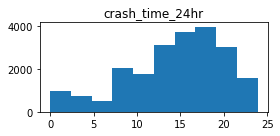

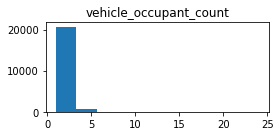

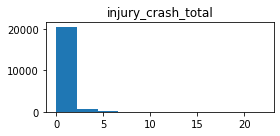

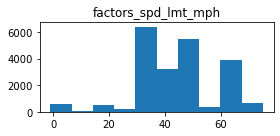

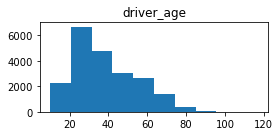

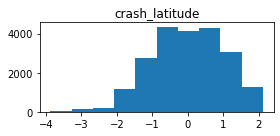

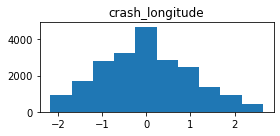

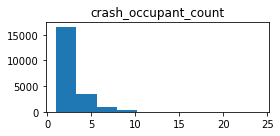

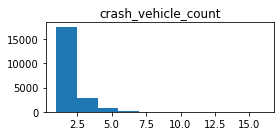

In [20]:
for col in X_train_scaled[quant_vars]:
    plt.figure(figsize=(4,2))
    plt.hist(X_train_scaled[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

## Main Takeaways:
A majority of the features appear to be normally distributed. Age is skewed right but this fits the trend as an individual gets older the less likely they are to be driving. Crash occupants appears to show some higher values but there is buses within the dataset so it is possible to see a hgiher number.



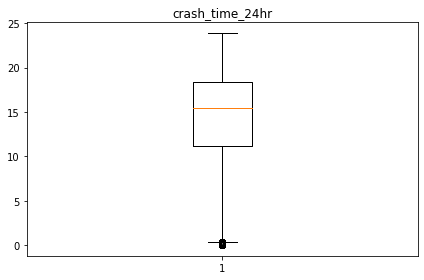

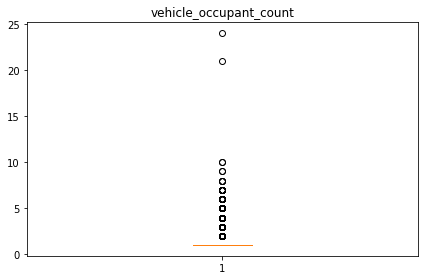

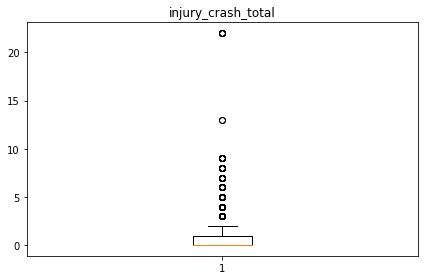

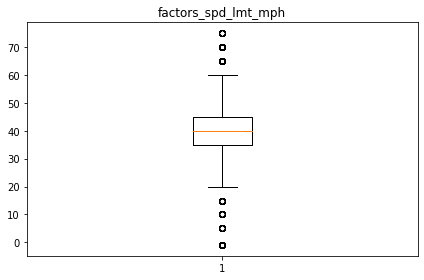

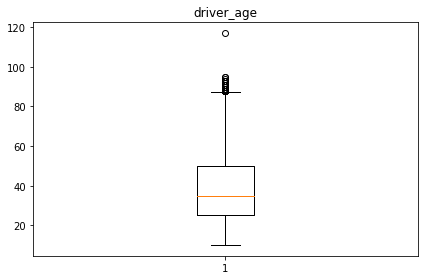

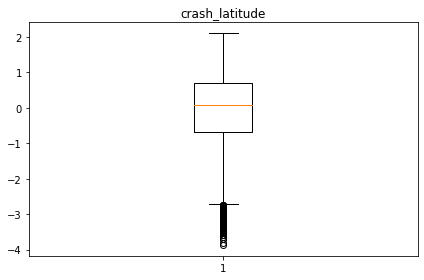

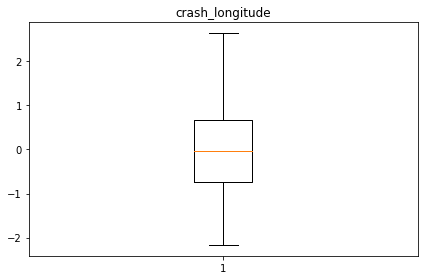

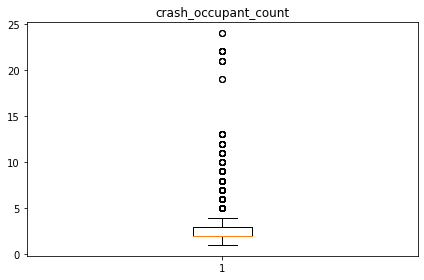

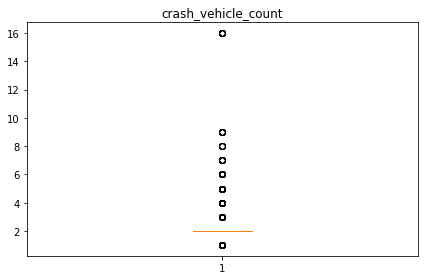

In [21]:
for col in X_train_scaled[quant_vars]:
    plt.figure(figsize=(6,4))
    plt.boxplot(X_train_scaled[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

## Main Takeaways:
Briefly looking into the outliers and can see their is some based on box plots. ALot of these values can be justified.



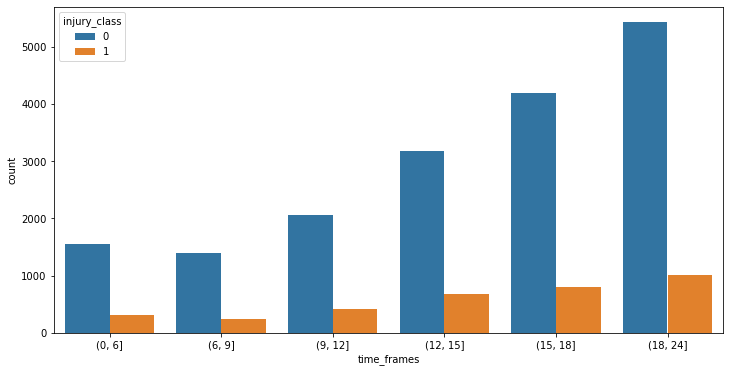

In [22]:
explore.discrete_var_visual('time_frames',X_train,hue = 'injury_class' )

## Main Takeaways:
There appears to be more injuries during later hours of the day, this makes sense as rush hour traffic and possibly people out late.



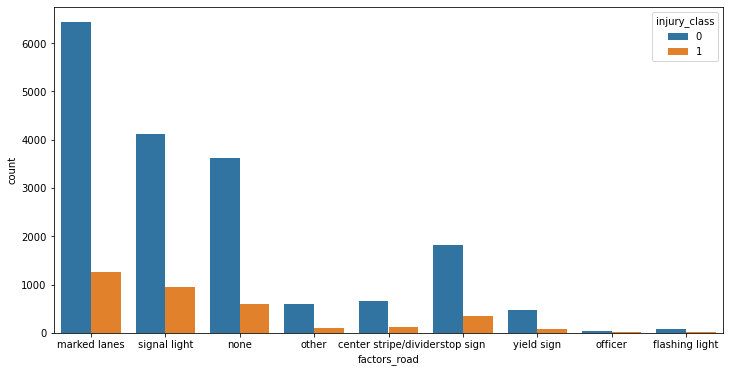

In [23]:
explore.discrete_var_visual('factors_road',train,hue = 'injury_class')

## Main Takeaways:
So marked lanes I believe to be typical of highways and streets so this makes sense we would see the most injuries occuring here since this is probably the most occuring values, signal lights based on domain knowledge we can expect to see injuries due to possible mishaps at signal lights or people not focusing as much.


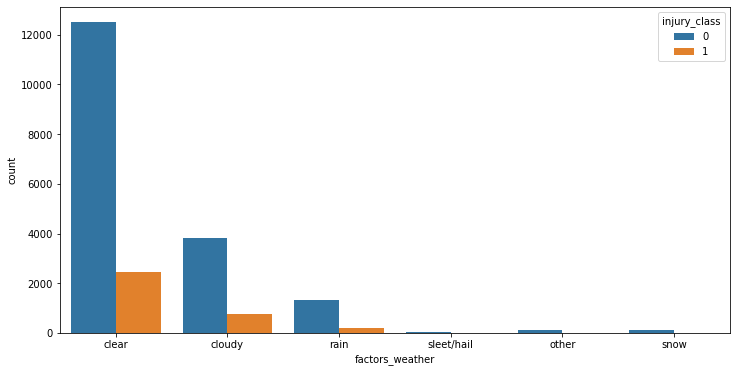

In [24]:
explore.discrete_var_visual('factors_weather',train,hue = 'injury_class')

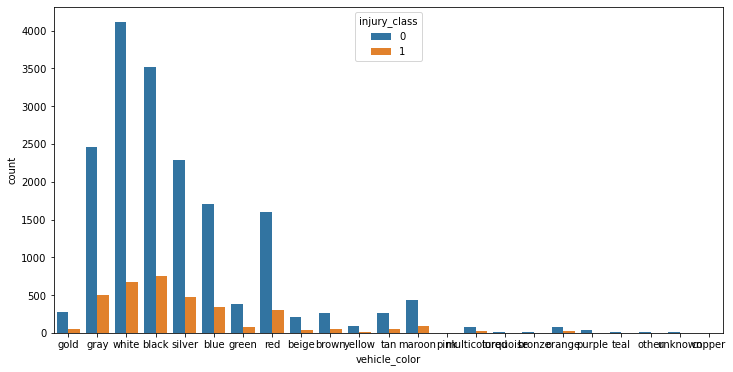

In [25]:
explore.discrete_var_visual('vehicle_color',train,hue = 'injury_class')

## Main Takeaways:
Black, white and silver, grey, appear to have the most injuries. Black is worth looking at, the higher count could be the result of black vehicles being hit more duirn late hours.


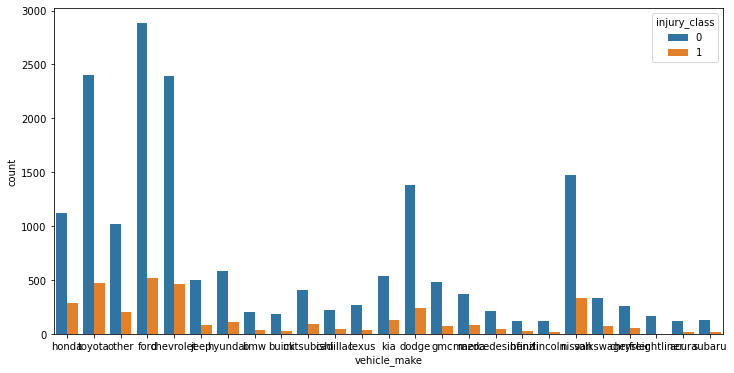

In [26]:
explore.discrete_var_visual('vehicle_make',train,hue = 'injury_class')

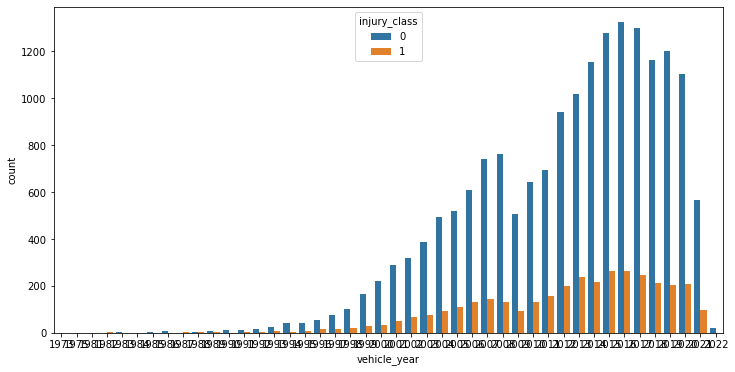

In [27]:
explore.discrete_var_visual('vehicle_year',train, hue = 'injury_class')

# Multivariate Exploration

sns.pairplot(data=train, vars=quant_vars, hue ='injury_class')
plt.show()

## Main Takeaways:
I do not see any clusters which really stand out. Obviously the injury crash total would be higher with more occupants in the vehicle.
Higher speeds appear to have a higher number of injuries.


sns.pairplot(data=train, vars=cat_vars, hue ='injury_class')
plt.show()

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21336 entries, 33143 to 3524
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   crash_date              21336 non-null  object  
 1   crash_id                21336 non-null  int64   
 2   crash_latitude          21336 non-null  float64 
 3   crash_longitude         21336 non-null  float64 
 4   crash_occupant_count    21336 non-null  int64   
 5   crash_vehicle_count     21336 non-null  int64   
 6   damage_airbag           21336 non-null  int64   
 7   damage_burned           21336 non-null  int64   
 8   damage_concentrated     21336 non-null  int64   
 9   damage_distributed      21336 non-null  int64   
 10  damage_rollover         21336 non-null  int64   
 11  damage_zone             21336 non-null  int64   
 12  dl_cdl                  21336 non-null  int64   
 13  dl_class_a              21336 non-null  int64   
 14  dl_class_b         

## Cluster 1

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# will utilize two features
X = train[['factors_spd_lmt_mph','vehicle_occupant_count','damage_zone']]
Xt = test[['factors_spd_lmt_mph','vehicle_occupant_count','damage_zone']]

In [22]:
#scaling the features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
T_scaled = pd.DataFrame(scaler.transform(Xt), columns= Xt.columns).set_index([Xt.index.values])

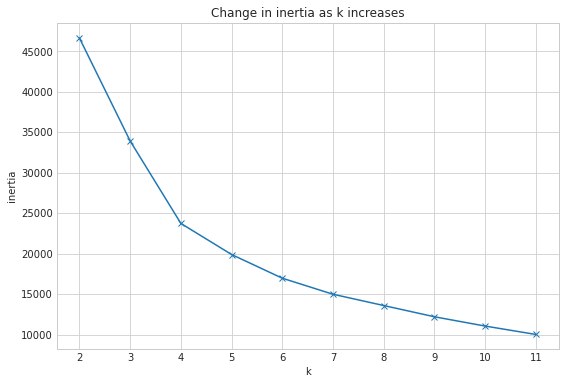

In [23]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop off at 5

In [24]:
#Prints out inertia of k
for k in range(2, 14):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

46666.70512080582
34132.46967695604
23750.87962634099
19904.44120263691
16937.52280477958
14952.286173026174
13531.490435084708
12339.5704704925
11108.870908655044
10007.1259244501
9425.968152847478
8607.655815208736


In [26]:
#Utilize the kmeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X_scaled)
kmeans.fit(T_scaled)
train['speed_occup_dz'] = kmeans.predict(X_scaled)
test['speed_occup_dz'] = kmeans.predict(T_scaled)

## Cluster 2

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# will utilize two features
X = train[['factors_spd_lmt_mph','fault_yield','vehicle_occupant_count']]
Xt = test[['factors_spd_lmt_mph','fault_yield','vehicle_occupant_count']]

In [29]:
#scaling the features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
T_scaled = pd.DataFrame(scaler.transform(Xt), columns= Xt.columns).set_index([Xt.index.values])

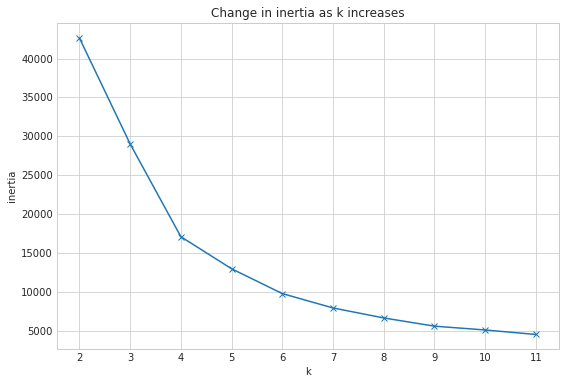

In [30]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop off at 5

In [31]:
#Prints out inertia of k
for k in range(2, 12):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

42652.64444605317
29572.817366684343
17081.36661527041
12955.281412195132
9577.437793262798
7887.875576969735
6545.795941343422
5570.451526576646
5036.280003037487
4360.061742666783


In [32]:
#Utilize the kmeans
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X_scaled)
kmeans.fit(T_scaled)
train['speed_yield_occup'] = kmeans.predict(X_scaled)
test['speed_yield_occup'] = kmeans.predict(T_scaled)

In [33]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time_24hr', 'time_frames',
       'speed_occup_dz', 'speed_yield_occup'],
      dtype='object')

## Cluster 3

In [34]:
from sklearn.preprocessing import StandardScaler

In [37]:
# will utilize two features
X = train[['factors_spd_lmt_mph','fault_yield', 'fault_speed']]
Xt = test[['factors_spd_lmt_mph','fault_yield', 'fault_speed']]

In [38]:
#scaling the features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
T_scaled = pd.DataFrame(scaler.transform(Xt), columns= Xt.columns).set_index([Xt.index.values])

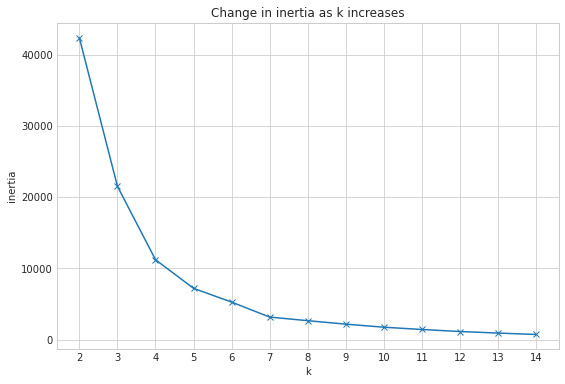

In [39]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop off at 5

In [41]:
#Prints out inertia of k
for k in range(2, 15):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

42384.5922916208
21540.229279025018
11233.253148272477
7210.694822414372
5279.409255158157
3175.299158851354
2667.780050951898
2241.2589768459584
1751.363750906911
1363.7157808991435
1166.4027196382822
919.0597245162256
741.1839680299746


In [43]:
#Utilize the kmeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
kmeans.fit(T_scaled)
train['speed_yield_speeding'] = kmeans.predict(X_scaled)
test['speed_yield_speeding'] = kmeans.predict(T_scaled)

In [44]:
#crash_vehicle_count, speed, occupants

## Cluster 4

In [49]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time_24hr', 'time_frames',
       'speed_occup_dz', 'speed_yield_occup', 'speed_yield_speeding'],
      dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
# will utilize two features
X = train[['fault_speed','vehicle_occupant_count', 'damage_zone']]
Xt = test[['fault_speed','vehicle_occupant_count', 'damage_zone']]

In [53]:
#scaling the features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
T_scaled = pd.DataFrame(scaler.transform(Xt), columns= Xt.columns).set_index([Xt.index.values])

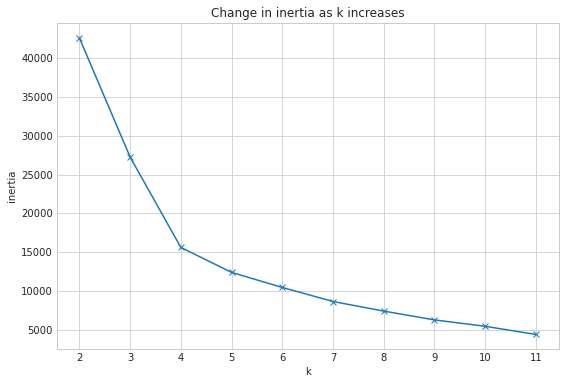

In [54]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop off at 5

In [55]:
#Prints out inertia of k
for k in range(2, 15):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

42567.27855348986
27253.944331736566
15626.458958540237
12389.057414336003
10477.367183139626
9263.937613728414
7759.221671626724
6510.28146324186
5278.479938441656
4831.621982903083
4138.737072441443
3697.951528569805
3144.547848412159


In [56]:
#Utilize the kmeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X_scaled)
kmeans.fit(T_scaled)
train['speeding_occu_dz'] = kmeans.predict(X_scaled)
test['speeding_occu_dz'] = kmeans.predict(T_scaled)

## Cluster 5

In [58]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time_24hr', 'time_frames',
       'speed_occup_dz', 'speed_yield_occup', 'speed_yield_speeding',
       'speeding_occu_dz'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
# will utilize two features
X = train[['fault_speed','fault_yield', 'damage_zone']]
Xt = test[['fault_speed','fault_yield', 'damage_zone']]

In [61]:
#scaling the features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
T_scaled = pd.DataFrame(scaler.transform(Xt), columns= Xt.columns).set_index([Xt.index.values])

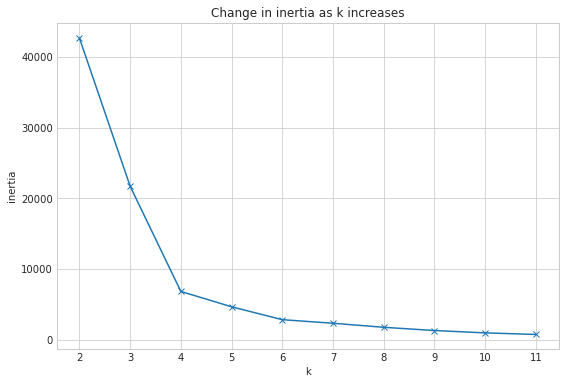

In [62]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop off at 5

In [63]:
#Prints out inertia of k
for k in range(2, 15):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

42564.217730001306
21732.27713129028
6866.606036097433
4700.376413013866
2878.017179971296
2301.711748892208
1803.115819410503
1350.8026119353806
1085.4110467786372
797.5374811135482
643.8062380628836
503.30873968672887
380.2565140135805


In [64]:
#Utilize the kmeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
kmeans.fit(T_scaled)
train['speeding_yield_dz'] = kmeans.predict(X_scaled)
test['speeding_yield_dz'] = kmeans.predict(T_scaled)

<AxesSubplot:title={'center':'Feautures  Correlating with injury_class'}>

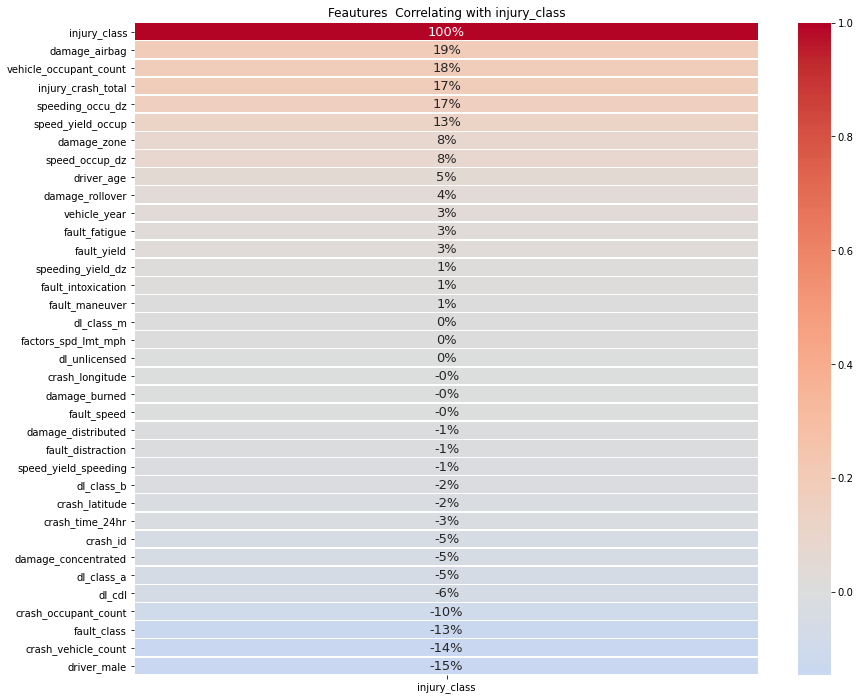

In [65]:
explore.get_heatmap(train, 'injury_class')

# Multivariate Exploration & Statistical Testing

In [ ]:
#speed and weather and distraction

In [ ]:
#driver age, speed and damage area.

In [45]:
alpha = 0.05

In [46]:
train.groupby(['fault_distraction', 'factors_road']).injury_class.value_counts(normalize = True)

fault_distraction  factors_road           injury_class
0                  center stripe/divider  0               0.828010
                                          1               0.171990
                   flashing light         0               0.871795
                                          1               0.128205
                   marked lanes           0               0.812555
                                          1               0.187445
                   none                   0               0.841542
                                          1               0.158458
                   officer                0               0.741935
                                          1               0.258065
                   other                  0               0.827763
                                          1               0.172237
                   signal light           0               0.802710
                                          1               0.197290
       

#### Looking into the groupings, those who were distracted it appears that being distracted while at signal light has the highest probability of resulting in injury.

----

<AxesSubplot:ylabel='fault_distraction,factors_weather,injury_class'>

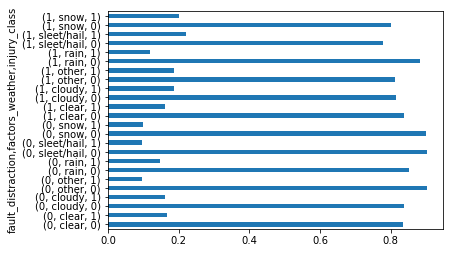

In [138]:
train.groupby(['fault_distraction', 'factors_weather']).injury_class.value_counts(normalize = True).plot.barh()

#### Looking into the groupings, those who were distracted it appears that being distracted during sleet hail and rain appears to result in higher percentage of injuries.

----

# Statistical Testing

---

In [111]:
#define alpha
alpha = 0.05

In [48]:
distraction = train[train.fault_distraction == 1]

In [49]:
#Statistical Testing

#Chi Tests
observed = pd.crosstab(distraction.injury_class, distraction.factors_weather)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
factors_weather  clear  cloudy  other  rain  sleet/hail  snow
injury_class                                                 
0                 4102     989     25   260           5     8
1                  904     274      9    48           3     1
---
Expected
[[4.07020730e+03 1.02690208e+03 2.76442366e+01 2.50424261e+02
  6.50452625e+00 7.31759203e+00]
 [9.35792698e+02 2.36097918e+02 6.35576343e+00 5.75757393e+01
  1.49547375e+00 1.68240797e+00]]
---

chi^2 = 14.3259
p     = 0.0137


In [93]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


The objective here was to see if the sub group of being distracted, the distracted injury classification was independent of weather factors. The results indicate it is not independent.

----

In [105]:
airbags_deploy = train[train.damage_airbag == 1]

In [106]:
airbags_deploy.shape

(4207, 47)

In [114]:
#Statistical Testing 
#Chi Tests
observed = pd.crosstab(airbags_deploy.injury_class, airbags_deploy.vehicle_occupant_count)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
vehicle_occupant_count     1    2    3   4   5  6  7
injury_class                                        
0                       2254  352  109  44  17  4  1
1                        956  324   96  32   9  5  4
---
Expected
[[2.12194200e+03 4.46863798e+02 1.35513430e+02 5.02391253e+01
  1.71870692e+01 5.94937010e+00 3.30520561e+00]
 [1.08805800e+03 2.29136202e+02 6.94865700e+01 2.57608747e+01
  8.81293083e+00 3.05062990e+00 1.69479439e+00]]
---

chi^2 = 107.8826
p     = 0.0000


In [113]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


The objective here was to see if the sub group in which an airbag deployed, if injury_class was independent of vehicle occupant count, the results indicate its not.

----

Form hypothesis:

$H_0$:failuire to yield and damage zone, they are independent

$H_a$:failuire to yield and damage zone, they are not independent

In [115]:
train.groupby(['fault_yield','damage_zone' ]).injury_class.value_counts(normalize = True)

fault_yield  damage_zone  injury_class
0            0            0               0.955556
                          1               0.044444
             1            0               0.844722
                          1               0.155278
             2            0               0.813455
                          1               0.186545
             3            0               0.870742
                          1               0.129258
             4            0               0.824361
                          1               0.175639
             5            0               0.879444
                          1               0.120556
             6            0               0.853256
                          1               0.146744
             7            0               0.846545
                          1               0.153455
             8            0               0.870968
                          1               0.129032
             9            0               0

In [116]:
failed_yield = train[train.fault_yield == 1]
failed_yield_speed_greater_30 = failed_yield[failed_yield.factors_spd_lmt_mph > 20]

In [117]:
#Statistical Testing 
#Chi Tests
observed = pd.crosstab(failed_yield_speed_greater_30.injury_class, failed_yield_speed_greater_30.damage_zone)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')



Observed
damage_zone   0    1   2   3   4   5   6   7   8   9
injury_class                                        
0             2  226  87  29  27  11  18  21  14   9
1             0   68  27   4   5   4   1   5   1  11
---
Expected
[[  1.55789474 229.01052632  88.8         25.70526316  24.92631579
   11.68421053  14.8         20.25263158  11.68421053  15.57894737]
 [  0.44210526  64.98947368  25.2          7.29473684   7.07368421
    3.31578947   4.2          5.74736842   3.31578947   4.42105263]]
---

chi^2 = 21.6832
p     = 0.0099


In [118]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


The objective here was to see if the sub group of those who failed to yield at speeds greater than 30 if the injury class for this subgroup was independent of damage zone, the results indicated it is not.

----

Form hypothesis:

$H_0$: (Occupant count greater than 1 and a speed of >= 50) and damage zone , they are independent

$H_a$: (Occupant count greater than 1 and a speed of >= 50) and damage zone , they are not independent

In [122]:
has_occupants = train[train.vehicle_occupant_count > 1]

In [123]:
train.groupby(['factors_spd_lmt_mph','vehicle_occupant_count','damage_zone' ]).injury_class.value_counts(normalize = True)

factors_spd_lmt_mph  vehicle_occupant_count  damage_zone  injury_class
-1                   1                       1            0               0.910448
                                                          1               0.089552
                                             2            0               0.914634
                                                          1               0.085366
                                             3            0               0.857143
                                                                            ...   
 75                  1                       4            1               0.500000
                     2                       1            0               1.000000
                     3                       2            0               1.000000
                     4                       6            0               1.000000
                     7                       1            1               1.000000
Name: injury_cla

In [124]:
speed = has_occupants[has_occupants.factors_spd_lmt_mph >= 50]

In [125]:
#Statistical Testing 
#Chi Tests
observed = pd.crosstab(speed.injury_class, speed.damage_zone)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')



Observed
damage_zone   0    1    2   3   4   5   6   7   8   9
injury_class                                         
0             2  292  225  44  78  33  33  56  24   8
1             0   99  124   7  20  11  17  18   8  10
---
Expected
[[  1.43372408 280.29305681 250.18485122  36.55996393  70.25247971
   31.54192967  35.84310189  53.0477908   22.93958521  12.90351668]
 [  0.56627592 110.70694319  98.81514878  14.44003607  27.74752029
   12.45807033  14.15689811  20.9522092    9.06041479   5.09648332]]
---

chi^2 = 28.2052
p     = 0.0009


In [126]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


-----

Form hypothesis:

$H_0$: Sub-Group(Any road conditions failed to yield) and damage airbags they are independent

$H_a$: Sub-Group(Any road conditions failed to yield) and damage airbags they are independent, they are not independent

In [100]:
train.fault_yield.value_counts()

0    20741
1      595
Name: fault_yield, dtype: int64

In [101]:
train.factors_road.value_counts()

marked lanes             7695
signal light             5072
none                     4213
stop sign                2173
center stripe/divider     784
other                     710
yield sign                537
flashing light             94
officer                    58
Name: factors_road, dtype: int64

In [102]:
has_road_factors = train[(train.factors_road != 'none') & (train.factors_road != 'other')]
failed_yield = has_road_factors[has_road_factors.fault_yield == 1]

In [103]:
#Statistical Testing 
#Chi Tests
observed = pd.crosstab(failed_yield.injury_class, failed_yield.damage_airbag)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed
damage_airbag    0   1
injury_class          
0              252  81
1               50  46
---
Expected
[[234.41958042  98.58041958]
 [ 67.58041958  28.41958042]]
---

chi^2 = 18.7864
p     = 0.0000


In [104]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

NameError: name 'alpha' is not defined

The objective here was to see if the sub group of those who failed to yield on any actual road conditions if the injury class for this subgroup was independent of damage_airbag, results indicate it is not

-----

# Main Takeaways Statistical Testing

My main objective was to look at subgroup. The reason behind this is because each variable on its own had a weak correlation to the target so by creating these subgroup through a combination of features
I wanted to see if there was indeed a relationship between the target and certain factors. This was mainly to use for supporting my decision to creature features utilizing clustering.

In [ ]:
#speed and weather and distraction

In [ ]:
#driver age, speed and damage area.

<AxesSubplot:title={'center':'Feautures  Correlating with injury_class'}>

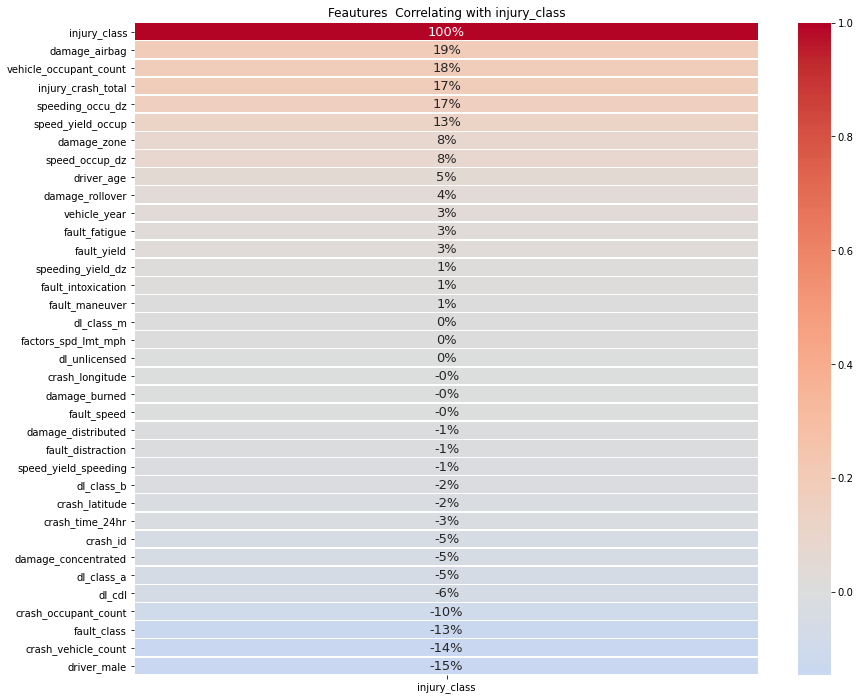

In [66]:
explore.get_heatmap(train, 'injury_class')

# Ask anna to do traffic conditions failed yield and was speeding!
# or instead of speeding do dz or number of occupants
# think of situation failure to yield at a signal light!

# Modeling: 

In [67]:
train.injury_class.value_counts() 

0    14938
1     3370
Name: injury_class, dtype: int64

In [ ]:
train['baseline_prediction'] = 0
baseline =(train.baseline_prediction == train.).mean()
baseline 
#baseline accuracy is 73.43%